In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from textblob import TextBlob
import seaborn as sns
import nltk.corpus
nltk.download('stopwords')
import nltk
from nltk.corpus import stopwords
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
import re
import string
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\slate\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# getting the stopwords 
stop_words = stopwords.words('english')

In [3]:
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [4]:
punc = string.punctuation
print(punc)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [7]:
# initializing logistic regression model and the sentiment analyzer
log_reg_model = LogisticRegression()
sia = SentimentIntensityAnalyzer()

In [8]:
# reading in the two csv files as data frames
df1 = pd.read_csv('financial_tweet_sentiment.csv')
df2 = pd.read_csv('stockerbot-export1.csv')


In [9]:
# checking the length is the same:
len(df1) == len(df2)

True

In [10]:
df1.head(3)

,cleaned_tweets,sentiment
0,video offic mind busi david solomon tell gs in...,0
1,price lumber lb f sinc hit ytd high maci turna...,0
2,say american dream dead,-1


In [11]:
df2.head(3)

,id,text,timestamp,source,symbols,company_names,url,verified
0,1.0197E+18,VIDEO: “I was in my office. I was minding my o...,Wed Jul 18 21:33:26 +0000 2018,GoldmanSachs,GS,The Goldman Sachs,https://twitter.com/i/web/status/1019696670777...,TRUE
1,1.01971E+18,The price of lumber $LB_F is down 22% since hi...,Wed Jul 18 22:22:47 +0000 2018,StockTwits,M,Macy's,https://twitter.com/i/web/status/1019709091038...,TRUE
2,1.01971E+18,Who says the American Dream is dead? https://t...,Wed Jul 18 22:32:01 +0000 2018,TheStreet,AIG,American,https://buff.ly/2L3kmc4,TRUE


In [12]:
# concatenating the 2 dataframes into one
df = pd.concat([df1,df2],axis=1)
df.head(3)

,cleaned_tweets,sentiment,id,text,timestamp,source,symbols,company_names,url,verified
0,video offic mind busi david solomon tell gs in...,0,1.0197E+18,VIDEO: “I was in my office. I was minding my o...,Wed Jul 18 21:33:26 +0000 2018,GoldmanSachs,GS,The Goldman Sachs,https://twitter.com/i/web/status/1019696670777...,TRUE
1,price lumber lb f sinc hit ytd high maci turna...,0,1.01971E+18,The price of lumber $LB_F is down 22% since hi...,Wed Jul 18 22:22:47 +0000 2018,StockTwits,M,Macy's,https://twitter.com/i/web/status/1019709091038...,TRUE
2,say american dream dead,-1,1.01971E+18,Who says the American Dream is dead? https://t...,Wed Jul 18 22:32:01 +0000 2018,TheStreet,AIG,American,https://buff.ly/2L3kmc4,TRUE


In [13]:
# checking for null values
df.isnull().sum()

cleaned_tweets       6
sentiment            0
id                   0
text                 0
timestamp            2
source               3
symbols              3
company_names        5
url               6391
verified             4
dtype: int64

In [18]:
# first removing url column and 

df.drop('url',axis=1,inplace=True)

,cleaned_tweets,sentiment,id,text,timestamp,source,symbols,company_names,verified
0,video offic mind busi david solomon tell gs in...,0,1.0197E+18,VIDEO: “I was in my office. I was minding my o...,Wed Jul 18 21:33:26 +0000 2018,GoldmanSachs,GS,The Goldman Sachs,TRUE


In [21]:
# then removing all rows with null values
df.dropna(inplace=True)

In [22]:
df.isnull().sum()

cleaned_tweets    0
sentiment         0
id                0
text              0
timestamp         0
source            0
symbols           0
company_names     0
verified          0
dtype: int64

In [23]:
df.columns
# will remove unnecessary columns: 

Index(['cleaned_tweets', 'sentiment', 'id', 'text', 'timestamp', 'source',
       'symbols', 'company_names', 'verified'],
      dtype='object')

In [25]:
df.drop(columns=['cleaned_tweets','id','verified'],inplace=True)

In [27]:
df['sentiment'].value_counts()

 0    17322
 1     8510
-1     2598
Name: sentiment, dtype: int64

<AxesSubplot:xlabel='sentiment', ylabel='count'>

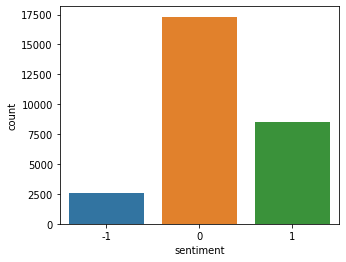

In [29]:
plt.figure(figsize=(5,4))
sns.countplot(data=df,x='sentiment')

<AxesSubplot:xlabel='sentiment', ylabel='count'>

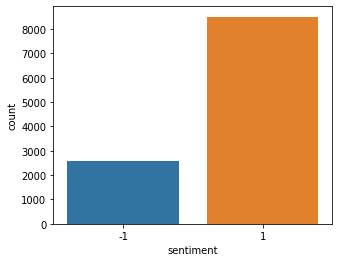

In [30]:
# and after removal of neutral (0)
df.drop(df[df['sentiment']==0].index,inplace=True)
plt.figure(figsize=(5,4))
sns.countplot(data=df,x='sentiment')

In [33]:
# creating a new column to represent 1 as Positive and -1 as Negative
df['pos_neg'] = df['sentiment'].apply(lambda x : 'Positive' if x>0 else 'Negative')

<AxesSubplot:xlabel='pos_neg', ylabel='count'>

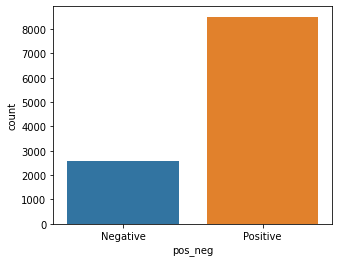

In [34]:
plt.figure(figsize=(5,4))
sns.countplot(data=df,x='pos_neg')

In [35]:
# columns to add => punctuation, pos,neg,neu(vader), token length
# adding punctuation count
def punc_num(text):
    num_punc = 0
    for l in text:
        if l in string.punctuation:
            num_punc+=1
    return num_punc
df['punctuation_count'] = df['text'].apply(lambda x: punc_num(x))

In [36]:
# getting the token length or number of words per text
df['token'] = df['text'].apply(lambda x: len(x.split()))

In [41]:
# getting the polarity sentiment scores (pos,neg,neu) 
df['sentiment_scores'] = df['text'].apply(lambda x: sia.polarity_scores(x))
df['sentiment_scores'].head(3)

2    {'neg': 0.35, 'neu': 0.488, 'pos': 0.163, 'com...
3    {'neg': 0.0, 'neu': 0.918, 'pos': 0.082, 'comp...
4    {'neg': 0.282, 'neu': 0.718, 'pos': 0.0, 'comp...
Name: sentiment_scores, dtype: object

In [44]:
# creating 4 new columns and removing the scores column
df['neg'] = df['sentiment_scores'].apply(lambda x: x['neg'])
df['pos'] = df['sentiment_scores'].apply(lambda x: x['pos'])
df['neu'] = df['sentiment_scores'].apply(lambda x: x['neu'])
df['compound'] = df['sentiment_scores'].apply(lambda x: x['compound'])
# df.drop(df['sentiment_scores'],axis=1,inplace=True)

In [45]:
df.drop('sentiment_scores',axis=1,inplace=True)

In [46]:
df.head(1)

,sentiment,text,timestamp,source,symbols,company_names,pos_neg,punctuation_count,token,neg,pos,neu,compound
2,-1,Who says the American Dream is dead? https://t...,Wed Jul 18 22:32:01 +0000 2018,TheStreet,AIG,American,Negative,6,8,0.35,0.163,0.488,-0.5106


In [69]:
# removing urls from text
def remove_url(text):
    return re.sub(r'http\S+','',text)
# def remove_stopwords(text):
#     temp = []
#     for word in text.split():
#         if word not in stop_words:
#             temp.append(word)
#         return ''.join(word)
def remove_url_www(text):
    return re.sub(r'www\S+','',text)

In [49]:
remove_url('i have a url https:www.google.com in my text')

'i have a url  in my text'

In [70]:
remove_url_www('i have a url www.yahoo.com in my text')

'i have a url  in my text'

In [51]:
remove_stopwords('It is not the same as this is with you are a big believer')

'It'

In [52]:
# removing punctuation and stopwords
df['text'] = df['text'].apply(lambda x: remove_url(x))
df['clean_text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [53]:
df.head(1)

,sentiment,text,timestamp,source,symbols,company_names,pos_neg,punctuation_count,token,neg,pos,neu,compound,clean_text
2,-1,Who says the American Dream is dead?,Wed Jul 18 22:32:01 +0000 2018,TheStreet,AIG,American,Negative,6,8,0.35,0.163,0.488,-0.5106,Who says American Dream dead?


In [54]:
df.columns

Index(['sentiment', 'text', 'timestamp', 'source', 'symbols', 'company_names',
       'pos_neg', 'punctuation_count', 'token', 'neg', 'pos', 'neu',
       'compound', 'clean_text'],
      dtype='object')

In [55]:
# number of tokens (words) column
df['token_units'] = df['text'].apply(lambda x: len(x.split()))

In [57]:
df['clean_text'] = df['clean_text'].apply(lambda x : ''.join(char for char in x if char not in stop_words))

In [60]:
df['new_clean_text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [61]:
df['new_clean_text']

2                            Who says American Dream dead?
3        Barry Silbert extremely optimistic bitcoin -- ...
4        How satellites avoid attacks space junk circli...
8        Senate wants emergency alerts go Netflix Spoti...
10       U.S. proposes expedited appeal fight AT&amp;T ...
                               ...                        
28428                    Kill$witch - $L Domo via @YouTube
28430    💰 BINANCE ALERT 💰 Binance registration ONLINE!...
28432    Exxon Once ‘Perfect Machine’ Is Running Dry - ...
28433    RT @cryptorangutang: To fallen heroes today's ...
28434    RT @ENewsMan: New exchange Telcoin!?!?! Mid Au...
Name: new_clean_text, Length: 11108, dtype: object

In [62]:
df.head(1)

,sentiment,text,timestamp,source,symbols,company_names,pos_neg,punctuation_count,token,neg,pos,neu,compound,clean_text,token_units,new_clean_text
2,-1,Who says the American Dream is dead?,Wed Jul 18 22:32:01 +0000 2018,TheStreet,AIG,American,Negative,6,8,0.35,0.163,0.488,-0.5106,Wh Aercn Dre e?,7,Who says American Dream dead?


In [63]:
df.drop('clean_text',axis=1,inplace=True)

In [64]:
df.corr()

,sentiment,punctuation_count,token,neg,pos,neu,compound,token_units
sentiment,1.000000,0.012054,0.042538,-0.708486,0.518228,-0.042740,0.712564,0.044818
punctuation_count,0.012054,1.000000,0.974782,-0.028483,-0.040902,0.060751,0.020981,0.970103
token,0.042538,0.974782,1.000000,-0.044838,-0.015723,0.046396,0.063105,0.999550
neg,-0.708486,-0.028483,-0.044838,1.000000,-0.353165,-0.322505,-0.692445,-0.046701
pos,0.518228,-0.040902,-0.015723,-0.353165,1.000000,-0.771674,0.841402,-0.018626
neu,-0.042740,0.060751,0.046396,-0.322505,-0.771674,1.000000,-0.380547,0.050600
compound,0.712564,0.020981,0.063105,-0.692445,0.841402,-0.380547,1.000000,0.062433
token_units,0.044818,0.970103,0.999550,-0.046701,-0.018626,0.050600,0.062433,1.000000


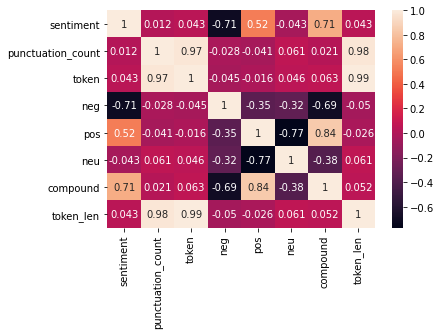

In [83]:

hm=sns.heatmap(df.corr(),annot=True)
# hm.show()

<AxesSubplot:xlabel='token_units', ylabel='count'>

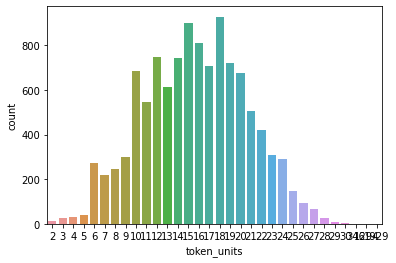

In [68]:
sns.countplot(data=df,x='token_units')

In [72]:
df['token_len'] = df['new_clean_text'].apply(lambda x: len(x.split()))

<AxesSubplot:xlabel='token_len', ylabel='count'>

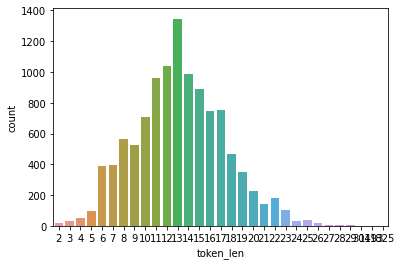

In [73]:
sns.countplot(data=df,x='token_len')

<AxesSubplot:>

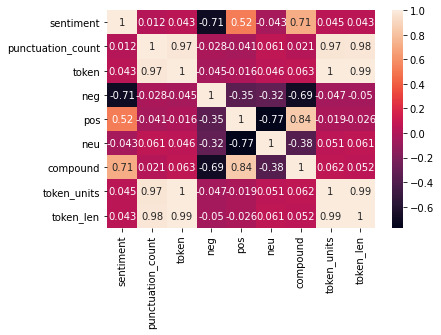

In [74]:
sns.heatmap(df.corr(),annot=True)

In [75]:
df.drop('token_units',axis=1,inplace=True)

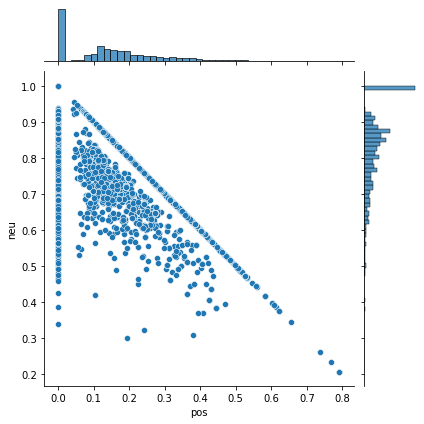

In [79]:
sns.jointplot(data=df,x='pos',y='neu')

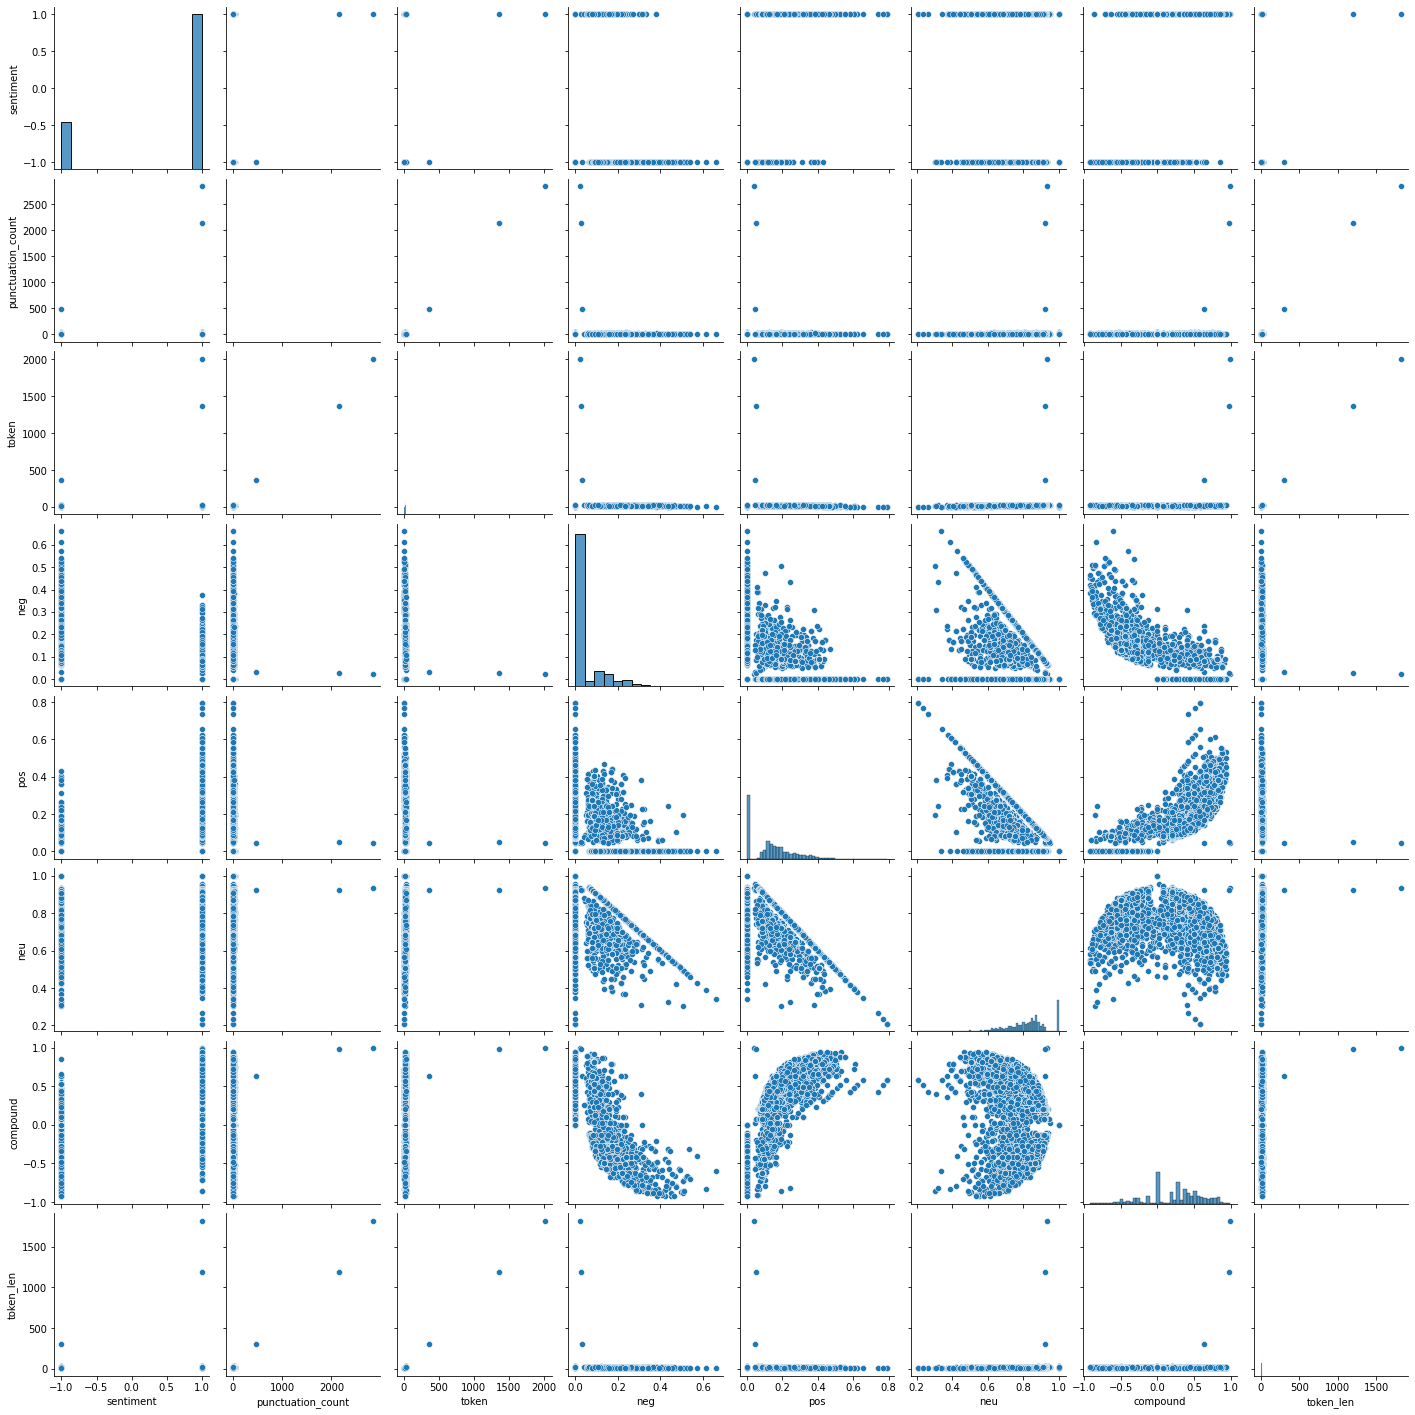

In [81]:
sns.pairplot(df)

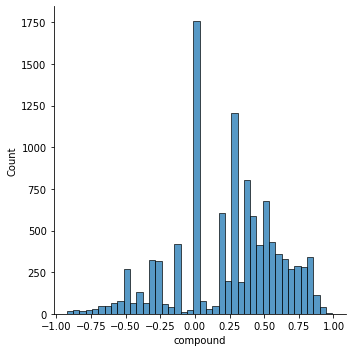

In [84]:
#distplot univariate
sns.displot(df['compound'])

In [85]:
df.drop(df[df['compound']==0].index,inplace=True)

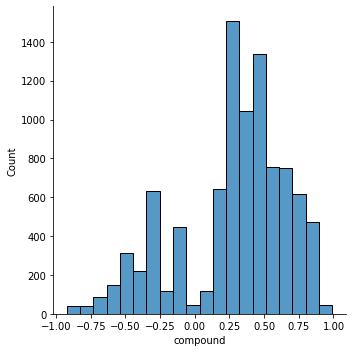

In [95]:
sns.displot(df['compound'],bins=20)

C:\Users\slate\anaconda33\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='company_names', ylabel='Density'>

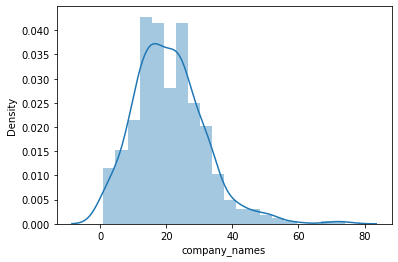

In [89]:
sns.distplot(df['company_names'].value_counts())

In [97]:
df.columns

Index(['sentiment', 'text', 'timestamp', 'source', 'symbols', 'company_names',
       'pos_neg', 'punctuation_count', 'token', 'neg', 'pos', 'neu',
       'compound', 'new_clean_text', 'token_len'],
      dtype='object')

In [108]:
def word_len(text):
    total_len = len(text)
    num_words = 0
    for word in text.split():
        num_words+=1
    return total_len/num_words

In [104]:
df.drop(df[df['token_len'] < 5].index,inplace=True)

In [109]:
df['avg_word_len'] = df['new_clean_text'].apply(lambda x: word_len(x))

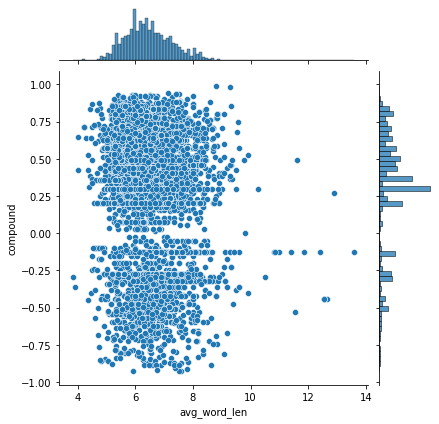

In [110]:
sns.jointplot(data=df,x='avg_word_len',y='compound')

In [111]:
df.columns

Index(['sentiment', 'text', 'timestamp', 'source', 'symbols', 'company_names',
       'pos_neg', 'punctuation_count', 'token', 'neg', 'pos', 'neu',
       'compound', 'new_clean_text', 'token_len', 'avg_word_len'],
      dtype='object')

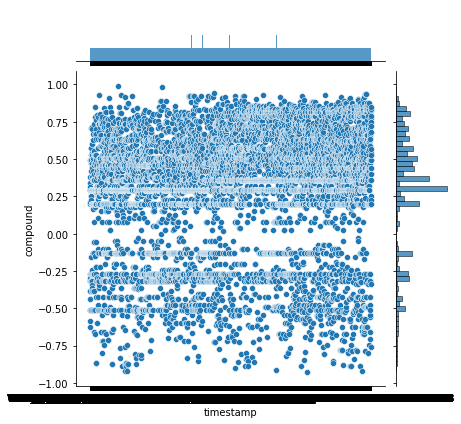

In [112]:
sns.jointplot(data=df,x='timestamp',y='compound')

In [117]:
for text in df['new_clean_text'][:10]:
    
    print('\n',text,'\n','*'*len(text))
    sent = sia.polarity_scores(text)
    for score in sent:
        print('{0}:{1} | '.format(score,sent[score]))


 Who says American Dream dead? 
 *****************************
neg:0.462 | 
neu:0.323 | 
pos:0.215 | 
compound:-0.5106 | 

 Barry Silbert extremely optimistic bitcoin -- predicts 99% new crypto entrants “going zero… 
 *******************************************************************************************
neg:0.0 | 
neu:0.822 | 
pos:0.178 | 
compound:0.3804 | 

 How satellites avoid attacks space junk circling Earth #paid @Oracle 
 ********************************************************************
neg:0.389 | 
neu:0.611 | 
pos:0.0 | 
compound:-0.6249 | 

 Senate wants emergency alerts go Netflix Spotify etc. @grg 
 **********************************************************
neg:0.245 | 
neu:0.755 | 
pos:0.0 | 
compound:-0.3818 | 

 U.S. proposes expedited appeal fight AT&amp;T Time Warner purchase 
 ******************************************************************
neg:0.245 | 
neu:0.755 | 
pos:0.0 | 
compound:-0.3818 | 

 Customers urge boycott MGM Resorts casino files lawsuits m

In [118]:
df.shape[0]

9281

In [119]:
len(df)

9281

In [126]:
positive_txt = []
negative_txt = []

for i in range(len(df)):
    if df['sentiment'].iloc[i] ==1:
        positive_txt.append(df['new_clean_text'].iloc[i])
    else:
        negative_txt.append(df['new_clean_text'].iloc[i])

In [123]:
df['new_clean_text'].iloc[0]

'Who says American Dream dead?'

In [140]:
def convert_lst(lst):
    return [i for item in lst for i in item.split()]

In [143]:
pos_word_lst = convert_lst(positive_txt)
neg_word_lst = convert_lst(negative_txt)

In [150]:
pos_word_dict = {}
neg_word_dict = {}

In [153]:
for word in pos_word_lst:
    if word not in pos_word_dict:
        pos_word_dict[word] = 1
    else:
        pos_word_dict[word] += 1
for word in neg_word_lst:
    if word not in neg_word_dict:
        neg_word_dict[word] = 1
    else: 
        neg_word_dict[word] += 1

In [152]:
pos_word_dict

{'Barry': 1,
 'Silbert': 1,
 'extremely': 2,
 'optimistic': 4,
 'bitcoin': 7,
 '--': 19,
 'predicts': 1,
 '99%': 10,
 'new': 173,
 'crypto': 93,
 'entrants': 1,
 '“going': 1,
 'zero…': 2,
 'Senate': 4,
 'wants': 6,
 'emergency': 1,
 'alerts': 24,
 'go': 45,
 'Netflix': 5,
 'Spotify': 1,
 'etc.': 3,
 '@grg': 1,
 'Trump': 13,
 'tells': 15,
 'CBS': 9,
 "he's": 3,
 '"always': 1,
 'wanted"': 1,
 'interviewed': 1,
 'Special': 4,
 'Counsel': 11,
 'Mueller': 1,
 'deflected': 1,
 'questions': 2,
 'whethe…': 1,
 'RT': 1261,
 '@josheidelson:': 1,
 'Exclusive:': 2,
 'Elon': 2,
 'Musk': 2,
 'called': 14,
 'Sierra': 1,
 "Club's": 1,
 'executive': 4,
 'director': 9,
 'Saturday': 1,
 '"asked': 1,
 'help': 70,
 'via': 129,
 'Twitter"': 1,
 'green': 9,
 'gr…': 2,
 'New': 138,
 'time:': 1,
 'Janet': 1,
 'Yellen': 1,
 'I': 196,
 'conversation': 3,
 'Brookings': 1,
 'Feb.': 1,
 '27': 5,
 '2': 47,
 'PM': 8,
 'EST.': 1,
 'Join': 820,
 'us': 160,
 'online': 11,
 'Facebook': 5,
 'Liv…': 1,
 'Analysts': 178,
 '

In [154]:
neg_word_dict

{'Who': 1,
 'says': 7,
 'American': 21,
 'Dream': 1,
 'dead?': 1,
 'How': 6,
 'satellites': 1,
 'avoid': 7,
 'attacks': 1,
 'space': 2,
 'junk': 1,
 'circling': 4,
 'Earth': 1,
 '#paid': 1,
 '@Oracle': 1,
 'U.S.': 52,
 'proposes': 1,
 'expedited': 1,
 'appeal': 8,
 'fight': 4,
 'AT&amp;T': 9,
 'Time': 20,
 'Warner': 13,
 'purchase': 1,
 'Customers': 1,
 'urge': 1,
 'boycott': 1,
 'MGM': 8,
 'Resorts': 8,
 'casino': 1,
 'files': 1,
 'lawsuits': 3,
 'mass': 1,
 'shooting': 6,
 'victims…': 1,
 'EBay': 3,
 'revenue': 6,
 'misses': 1,
 'weak': 8,
 'sporting': 1,
 'season': 2,
 'hits': 2,
 'StubHub': 1,
 'Arthur': 3,
 'J': 10,
 'Gallagher': 4,
 '&amp;': 132,
 'Co': 31,
 '$AJG': 5,
 'vs.': 23,
 'Marsh': 2,
 'McLennan': 2,
 'Companies': 9,
 '$MMC': 2,
 'Critical': 135,
 'Contrast': 16,
 'Wondering': 53,
 'risks': 51,
 '$IRM?': 2,
 'The': 158,
 '21-day': 23,
 'volatility': 53,
 '4.12%': 2,
 '$REG': 2,
 'Max': 138,
 'Pain': 145,
 '60.00': 5,
 'maturity': 134,
 '07/20/2018.': 118,
 '#maxpain': 13

In [155]:
pos_and_neg = set(neg_word_dict.keys()).intersection(set(pos_word_dict.keys()))

In [157]:
len(pos_and_neg)

3538

In [158]:
len(pos_word_dict)

17594

In [159]:
len(neg_word_dict)

7366

In [160]:
pos_and_neg

{'$MAR',
 '$116.00',
 'dividends',
 '$LNT',
 'happened',
 'i…',
 'misses',
 '$IDXX',
 '$t',
 'purchased',
 'Symantec',
 'Went',
 '$ACIA',
 'Hd',
 '$1.62',
 'former',
 'Can',
 '$ADA',
 'worse',
 '500',
 'part',
 'Foster',
 'Tomorrow',
 'Far)',
 'Aon',
 '@Citadel_Team',
 'Adage',
 'ONEOK',
 '$0.69',
 'ca…',
 'Gold',
 'Hold',
 'everyone.',
 '$ATVI',
 '$ZRX',
 'Remember',
 '$14.94',
 'labor',
 '#pharma',
 'Vantage',
 '@zipjet',
 'Procter',
 '$NTNX',
 'Trimmed',
 'June',
 'Hess',
 '@Drugdoctor2014:',
 '$RRD',
 'targets',
 'I…',
 '$LMT',
 '$SNPS',
 '$APC',
 'Positive',
 '17',
 'Puerto',
 '$HSTM',
 'On',
 'watching',
 'passed',
 'f…',
 'bottom',
 'shit',
 '$iq',
 'time',
 '$NOK',
 '@BluegrassCap',
 'For',
 'Western',
 'Ameren',
 'notice',
 'Canadian',
 'Ltd.',
 'bid',
 '$MHK',
 'growth',
 'site',
 'Wellington',
 '#hemp',
 '$BSM',
 '$CVS:',
 'upgrade',
 '$myl',
 '$SFIX',
 '#stockmarket',
 '$START',
 'getting',
 '$BKX',
 'fall',
 'waiting',
 'Xilinx',
 'case',
 'ANSYS',
 'Who',
 'Genetics',
 'p

In [172]:
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_w_cloud(data,title=None):
    wordcloud = WordCloud(background_color='purple',stopwords=stopwords,
                         max_words=150,max_font_size=20,min_font_size=5,scale=4).generate(str(data))

    fig = plt.figure(1, figsize=(12,8))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.show()

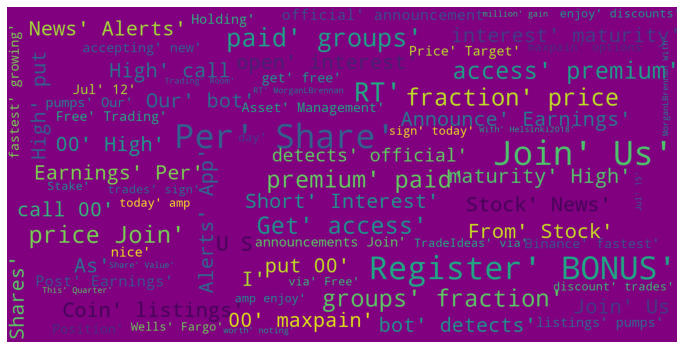

In [175]:
show_w_cloud(pos_word_lst)

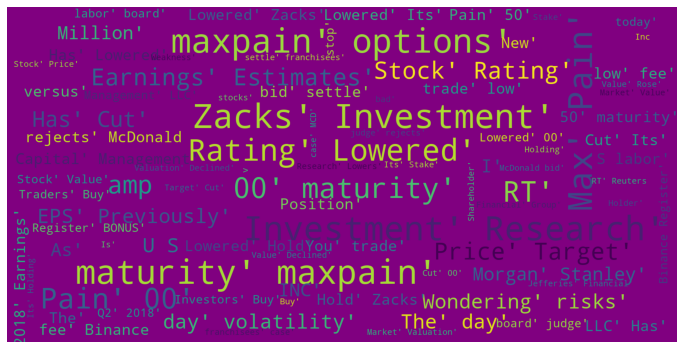

In [174]:
show_w_cloud(neg_word_lst)

In [193]:
df.token.value_counts()

20    871
17    738
18    722
16    713
19    694
12    588
14    583
13    572
21    571
15    555
11    464
22    422
23    394
24    291
10    282
9     193
8     180
25    152
7     108
26     88
27     40
6      24
28     19
5       6
29      6
30      2
Name: token, dtype: int64

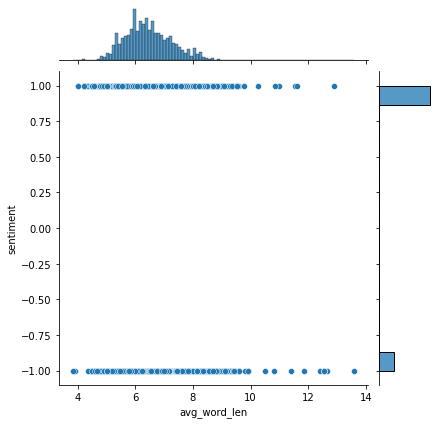

In [181]:
sns.jointplot(data=df,x='avg_word_len',y='sentiment')

In [184]:
df.drop(columns=['token_len','avg_word_len','pos','neg','neu'],inplace=True)

C:\Users\slate\anaconda33\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


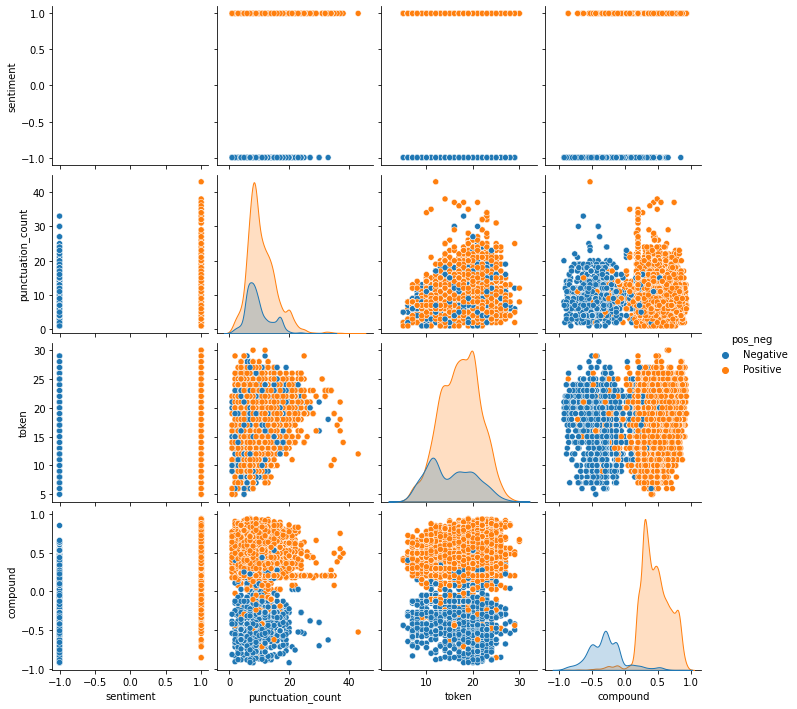

In [190]:
sns.pairplot(df,hue='pos_neg')

In [189]:
df.drop(df[df['punctuation_count']>100].index,inplace=True)

<AxesSubplot:>

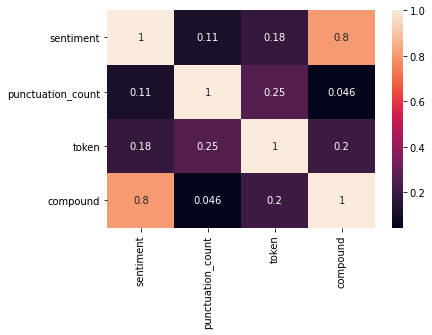

In [197]:
sns.heatmap(df.corr(),annot=True)

In [198]:
df.head(2)

,sentiment,text,timestamp,source,symbols,company_names,pos_neg,punctuation_count,token,compound,new_clean_text
2,-1,Who says the American Dream is dead?,Wed Jul 18 22:32:01 +0000 2018,TheStreet,AIG,American,Negative,6,8,-0.5106,Who says American Dream dead?
3,1,Barry Silbert is extremely optimistic on bitco...,Wed Jul 18 22:52:52 +0000 2018,MarketWatch,BTC,Bitcoin,Positive,8,21,0.2014,Barry Silbert extremely optimistic bitcoin -- ...


In [199]:
df.drop('text',axis=1,inplace=True)

In [203]:
df['punc_count'] = df['punctuation_count']

In [204]:
df.head(1)

,sentiment,timestamp,source,symbols,company_names,pos_neg,punctuation_count,token,compound,new_clean_text,punc_count
2,-1,Wed Jul 18 22:32:01 +0000 2018,TheStreet,AIG,American,Negative,6,8,-0.5106,Who says American Dream dead?,6


<AxesSubplot:xlabel='compound', ylabel='pos_neg'>

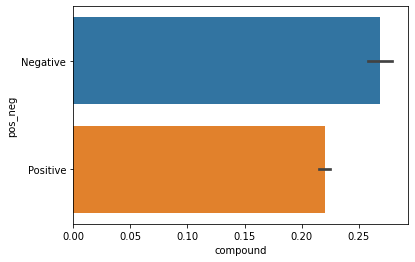

In [219]:
# standard deviation
sns.barplot(x='compound',y='pos_neg',data=df,estimator=np.std)

In [217]:
df[(df['sentiment']>0) & (df['compound']<0)]

,sentiment,timestamp,source,symbols,company_names,pos_neg,punctuation_count,token,compound,new_clean_text,punc_count
8,1,Wed Jul 18 23:09:00 +0000 2018,TechCrunch,NFLX,Netflix,Positive,7,14,-0.3818,Senate wants emergency alerts go Netflix Spoti...,7
288,1,Mon Jul 09 13:13:06 +0000 2018,FASTGraphs,ROP,Roper Technologies,Positive,8,19,-0.3412,$ROP Roper Technologies: The Best-Performing D...,8
289,1,Mon Jul 09 13:15:03 +0000 2018,1MinuteStock,AON,Aon plc,Positive,9,14,-0.2411,Not sure $AON? Explore #fundamental pros cons.,9
541,1,Mon Jul 09 19:32:01 +0000 2018,ClassicIsComing,ETE,Energy Transfer Equity,Positive,11,17,-0.0534,Alert* Misinformation behalf @MinerGate blog p...,11
550,1,Mon Jul 09 19:45:21 +0000 2018,BeerdHead,ETE,Energy Transfer Equity,Positive,8,19,-0.0534,RT @ClassicIsComing: Alert* Misinformation beh...,8
...,...,...,...,...,...,...,...,...,...,...,...
27217,1,Wed Jul 18 22:11:30 +0000 2018,OptionsSTrader1,NFLX,Netflix,Positive,8,24,-0.4782,Had $BABA 197.5 calls @ .50 good today sloppy ...,8
27502,1,Wed Jul 18 22:32:29 +0000 2018,RatingsNetwork,AXP,American Express Company,Positive,9,16,-0.4404,AmEx 2Q profit rises worry spots lending $AXP ...,9
27504,1,Wed Jul 18 22:32:34 +0000 2018,MarketBeatNews,AXP,American Express Company,Positive,9,16,-0.4404,AmEx 2Q profit rises worry spots lending $AXP ...,9
27676,1,Wed Jul 18 22:47:38 +0000 2018,LIBRA14885,SRPT,Sarepta Therapeutics,Positive,8,22,-0.1053,@RBBio1 IF $srpt stuff channel like last quart...,8


In [223]:
print(df[df['sentiment']==1].describe())

       sentiment  punctuation_count        token     compound   punc_count
count     7165.0        7165.000000  7165.000000  7165.000000  7165.000000
mean         1.0          10.811724    17.229449     0.456851    10.811724
std          0.0           4.795643     4.240580     0.220140     4.795643
min          1.0           1.000000     5.000000    -0.857900     1.000000
25%          1.0           8.000000    14.000000     0.296000     8.000000
50%          1.0          10.000000    17.000000     0.440400    10.000000
75%          1.0          13.000000    20.000000     0.621900    13.000000
max          1.0          43.000000    30.000000     0.942300    43.000000


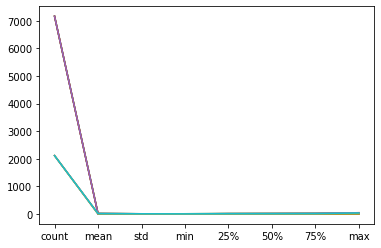

In [227]:
plt.plot(df[df['sentiment']==1].describe())
plt.plot(df[df['sentiment']==-1].describe())

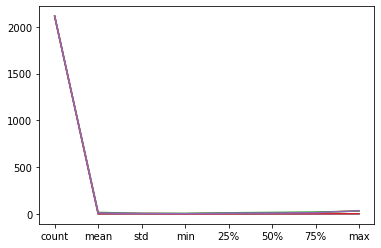

In [226]:
plt.plot(df[df['sentiment']==-1].describe())

<AxesSubplot:xlabel='sentiment', ylabel='count'>

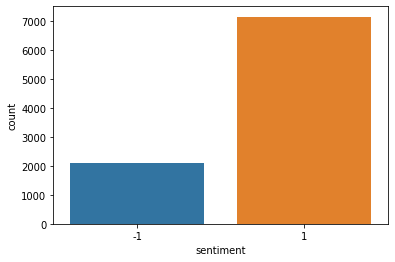

In [228]:
sns.countplot(x='sentiment',data=df)

<AxesSubplot:xlabel='symbols', ylabel='count'>

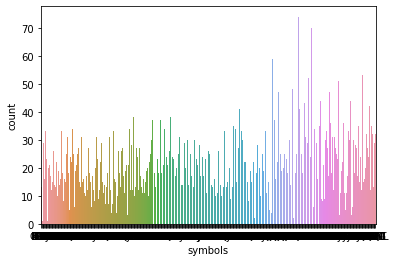

In [231]:
sns.countplot(x='symbols',data=df)

<AxesSubplot:xlabel='sentiment', ylabel='token'>

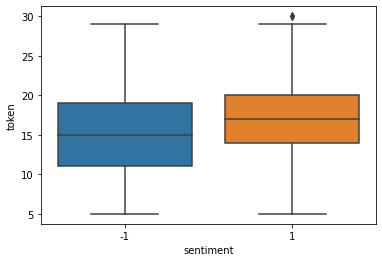

In [232]:
sns.boxplot(x='sentiment',y='token',data=df)

In [235]:
df.drop('punctuation_count',axis=1,inplace=True)

In [238]:
df.source.value_counts()

optioncharts       282
bibeypost_stock    279
whatsonthorold2    269
mmahotstuff1       250
reurope_stock      176
                  ... 
quasiloco            1
insidermonkey        1
connie2589           1
rjparrish48          1
_DaddyDanger         1
Name: source, Length: 2609, dtype: int64

In [239]:
df.drop('source',axis=1,inplace=True)

In [240]:
df.head(1)

,sentiment,timestamp,symbols,company_names,pos_neg,token,compound,new_clean_text,punc_count
2,-1,Wed Jul 18 22:32:01 +0000 2018,AIG,American,Negative,8,-0.5106,Who says American Dream dead?,6


<AxesSubplot:xlabel='sentiment', ylabel='punc_count'>

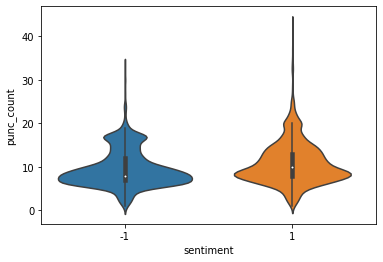

In [242]:
sns.violinplot(x='sentiment',y='punc_count',data=df)

<AxesSubplot:xlabel='sentiment', ylabel='token'>

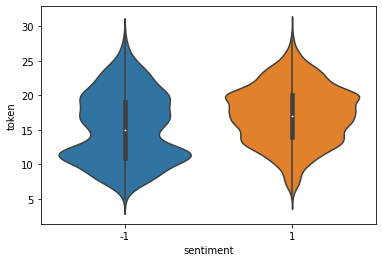

In [243]:
sns.violinplot(x='sentiment',y='token',data=df)

In [ ]:
#matrix plots
